In [31]:
install.packages("DescTools")
install.packages("mvtnorm")
install.packages("expm")

also installing the dependencies ‘mvtnorm’, ‘expm’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(dplyr)
library("DescTools")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Blood Pressure Dataset

https://github.com/Opensourcefordatascience/Data-sets/blob/master/blood_pressure.csv

In [3]:
blood_pressure <- read.csv("datasets/blood_pressure.csv", header = TRUE)

head(blood_pressure)

patient,sex,agegrp,bp_before,bp_after
1,Male,30-45,143,153
2,Male,30-45,163,170
3,Male,30-45,153,168
4,Male,30-45,153,142
5,Male,30-45,146,141
6,Male,30-45,150,147


In [4]:
dim(blood_pressure)

[1] 120   5

In [5]:
str(blood_pressure)

'data.frame':	120 obs. of  5 variables:
 $ patient  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sex      : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ agegrp   : Factor w/ 3 levels "30-45","46-59",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ bp_before: int  143 163 153 153 146 150 148 153 153 158 ...
 $ bp_after : int  153 170 168 142 141 147 133 141 131 125 ...


In [6]:
summary(blood_pressure)

    patient           sex       agegrp     bp_before        bp_after    
 Min.   :  1.00   Female:60   30-45:40   Min.   :138.0   Min.   :125.0  
 1st Qu.: 30.75   Male  :60   46-59:40   1st Qu.:147.0   1st Qu.:140.8  
 Median : 60.50               60+  :40   Median :154.5   Median :149.5  
 Mean   : 60.50                          Mean   :156.4   Mean   :151.4  
 3rd Qu.: 90.25                          3rd Qu.:164.0   3rd Qu.:161.0  
 Max.   :120.00                          Max.   :185.0   Max.   :185.0  

In [7]:
options(repr.plot.width = 6, repr.plot.height = 5)

### Density plot for BP before and after treatment

We can figure out that the distribution for BP after and before treatment is almost same

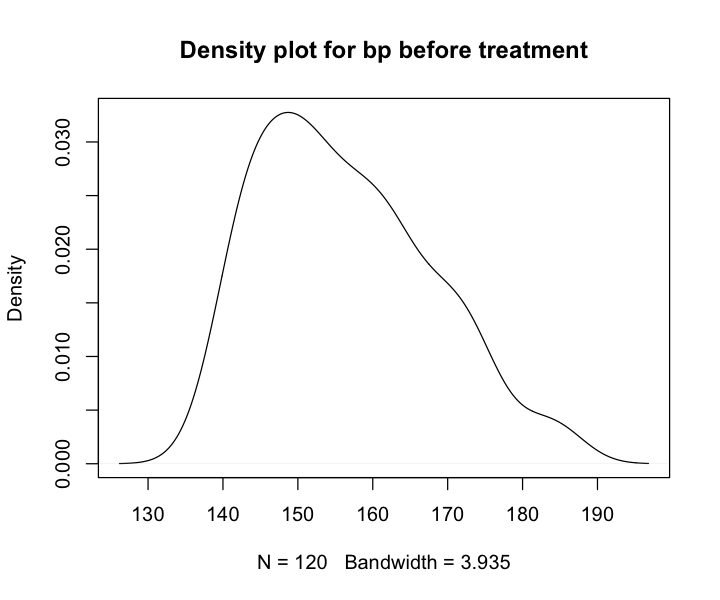

In [8]:
d1 <- density(blood_pressure$bp_before)

plot(d1, main = "Density plot for bp before treatment")

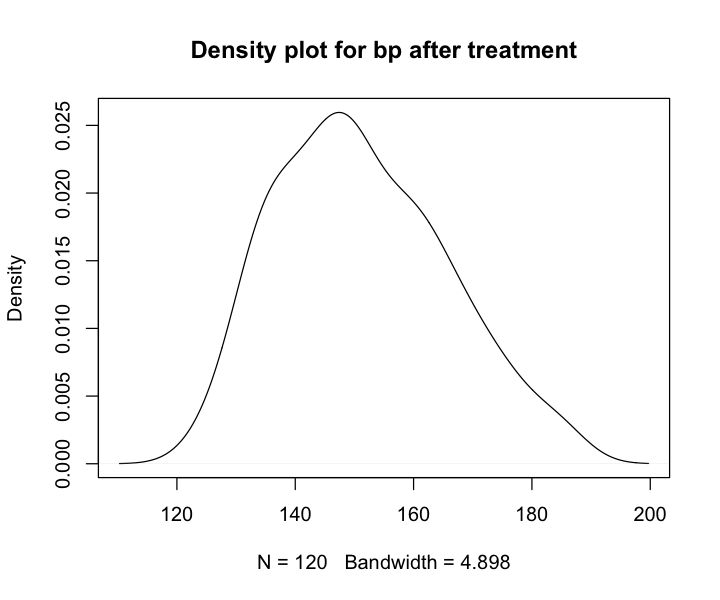

In [9]:
d2 <- density(blood_pressure$bp_after)

plot(d2, main = "Density plot for bp after treatment")

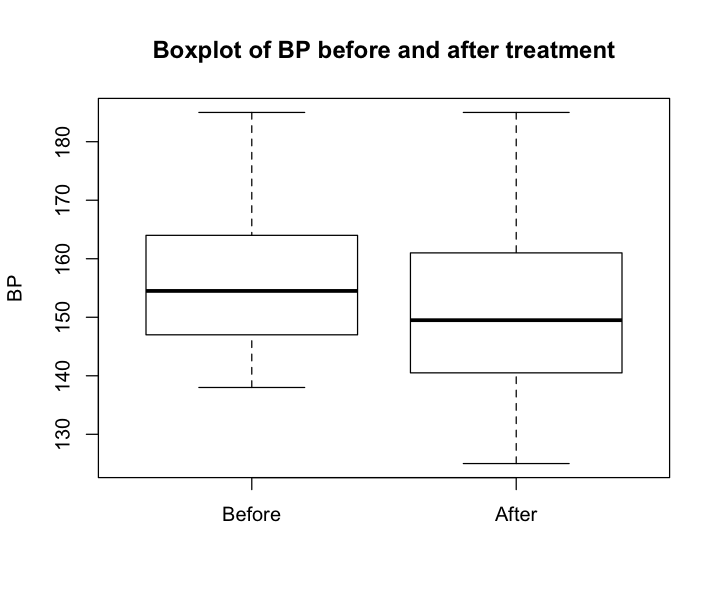

In [10]:
bp <- c("Before", "After")

boxplot(blood_pressure$bp_before, 
        blood_pressure$bp_after,
        names = bp,
        horizontal = FALSE, 
        main ="Boxplot of BP before and after treatment", ylab= "BP")

### Paired samples t-test

If the p-value is inferior or equal to 0.05, we can conclude that the difference between the two paired samples are significantly different.

In [11]:
summary(blood_pressure$bp_before)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  138.0   147.0   154.5   156.4   164.0   185.0 

In [12]:
summary(blood_pressure$bp_after)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  125.0   140.8   149.5   151.4   161.0   185.0 

In [13]:
paired_ttest <- t.test(blood_pressure$bp_before, blood_pressure$bp_after, 
                       paired = TRUE, 
                       alternative = "two.sided")

paired_ttest


	Paired t-test

data:  blood_pressure$bp_before and blood_pressure$bp_after
t = 3.3372, df = 119, p-value = 0.00113
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.070557 8.112776
sample estimates:
mean of the differences 
               5.091667 


In [14]:
names(paired_ttest)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

In [15]:
paired_ttest$method

[1] "Paired t-test"

In [16]:
paired_ttest$statistic

t 
3.337187

In [17]:
paired_ttest$p.value

[1] 0.001129791

### Paired Z-test

In [18]:
sd_bp <-  sd(blood_pressure$bp_after) - sd(blood_pressure$bp_before)

sd_bp

[1] 2.787777

In [19]:
Paired_ZTest <- with(select(blood_pressure, bp_before, bp_after),
                     ZTest(bp_before, bp_after, sd_pop = sd_bp, paired = TRUE))

Paired_ZTest


	Paired z-test

data:  bp_before and bp_after
z = 20.007, Std. Dev. Population = 2.7878, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.592879 5.590454
sample estimates:
mean of the differences 
               5.091667 


In [20]:
names(Paired_ZTest)

[1] "statistic"   "p.value"     "parameter"   "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

In [21]:
Paired_ZTest$method

[1] "Paired z-test"

In [22]:
Paired_ZTest$data.name

[1] "bp_before and bp_after"

In [23]:
Paired_ZTest$statistic

z 
20.00749

In [24]:
Paired_ZTest$p.value

[1] 4.739495e-89